# Chapter 15. Processing Sequences Using RNNs and CNNs

RNNs in Focus: The chapter delves into recurrent neural networks (RNNs), a specialized neural network category capable of predicting future events, particularly in time series data.

Versatility in Sequence Analysis: RNNs excel in analyzing sequences of arbitrary lengths, proving valuable in applications ranging from stock market predictions to autonomous driving systems and natural language processing tasks.

Fundamentals and Training: The chapter covers fundamental concepts of RNNs and details their training using the backpropagation through time technique.

Challenges and Solutions: Addressing challenges faced by RNNs, the text discusses unstable gradients and proposes solutions such as recurrent dropout and layer normalization. It also tackles the issue of limited short-term memory, providing insights into extending it using LSTM and GRU cells.

Alternative Approaches for Sequential Data: While RNNs are suitable for sequential data, the text acknowledges that regular dense networks and convolutional neural networks (CNNs) can effectively handle small and long sequences, respectively.

Introduction to WaveNet: The chapter concludes by introducing the WaveNet, a CNN architecture specifically designed for sequences with tens of thousands of time steps.

Upcoming Exploration: The subsequent chapter promises further exploration of RNNs, emphasizing their applications in natural language processing. Additionally, newer architectures incorporating attention mechanisms will be discussed.

## Recurrent Neurons and Layers

Recurrent Neural Networks (RNNs) Overview:

* Feedforward vs. Recurrent Networks: The text contrasts feedforward neural networks with recurrent neural networks (RNNs), highlighting the latter's bidirectional connections.

* Basic Structure of an RNN: An introductory exploration of the simplest RNN structure, consisting of one neuron receiving inputs, producing an output, and feeding it back to itself.

* Time Unrolling: The concept of unrolling the recurrent neuron through time, illustrating its evolution at each time step.

* Layer of Recurrent Neurons: The extension to multiple neurons in a layer, emphasizing their connectivity to both input vectors and outputs from the previous time step.

Mathematics Behind RNNs:

* Weight Matrices and Output Calculation: Explanation of the weight matrices, W and W, and the mathematical formulation for computing the output of the entire recurrent layer.

* Mini-Batch Processing: Demonstrating the simultaneous computation of the recurrent layer's output for a whole mini-batch.

* Memory Cells: Introduction to the notion of memory cells within an RNN, highlighting their ability to retain information across time steps.

* Cell State and Output: Describing the relationship between a cell's state at a given time step and its output, with a glimpse into more complex cells capable of learning longer patterns.

Input-Output Sequences:

* Simultaneous Input and Output Sequences: The capability of an RNN to handle input and output sequences concurrently, with potential applications in predicting time series like stock prices.

* Different Sequence Architectures: An overview of various sequence architectures, including sequence-to-vector, vector-to-sequence, and Encoder-Decoder networks, each serving different purposes.

Training Challenges:

* Training a Recurrent Neural Network: The text concludes by posing the question of how to train an RNN, paving the way for further exploration in subsequent sections.

## Training RNNs

Training an RNN: Backpropagation Through Time (BPTT):

* Unrolling Through Time: The key strategy in training an RNN involves unrolling it through time, allowing for the application of regular backpropagation.

* Backpropagation Through Time (BPTT): The process begins with a forward pass through the unrolled network, followed by the evaluation of the output sequence using a cost function. This cost function may selectively consider outputs, for instance, in a sequence-to-vector RNN where only the last output matters. Gradients of the cost function are then propagated backward through the unrolled network.

* Model Parameter Update: The final step involves updating the model parameters using the gradients computed during BPTT. Importantly, the gradients flow backward through all relevant outputs used by the cost function, ensuring a comprehensive learning process.

* Implementation with tf.keras: The text mentions that the complexity of BPTT is managed by tf.keras, simplifying the coding process for practitioners.

* Readiness to Code: The section concludes by indicating the readiness to start coding, emphasizing the streamlined implementation facilitated by tf.keras.

**Understanding Time Series Data:**

- *Definition:* Time series data involves sequences of one or more values per time step, with univariate time series having a single value and multivariate time series having multiple values at each time step.

- *Common Tasks:* Predicting future values (forecasting) and imputing missing values from the past (imputation) are common tasks associated with time series data.

- *Data Generation Function:* The text introduces a function, `generate_time_series()`, creating synthetic time series data for illustration. The function produces univariate time series with two sine waves of random frequencies and phases, plus some noise.

- *Data Representation:* Time series input features are generally represented as 3D arrays of shape [batch size, time steps, dimensionality], where dimensionality is 1 for univariate and more for multivariate time series.

**Creating Training, Validation, and Test Sets:**

- *Data Splitting:* The generated time series data is split into training, validation, and test sets for model evaluation.

- *Baseline Metrics:* Before employing Recurrent Neural Networks (RNNs), baseline metrics are established. Naive forecasting, predicting the last value in each series, and a simple fully connected network are used for comparison.

**Implementing Simple RNN:**

- *Introduction to Simple RNN:* A basic RNN model is introduced with a single layer containing a single neuron.

- *Model Evaluation:* The simple RNN is evaluated, and its Mean Squared Error (MSE) is compared to baseline metrics.

**Deepening RNNs:**

- *Introduction to Deep RNN:* To enhance performance, multiple layers of cells are stacked, creating a deep RNN.

- *Implementation:* The text provides a simple implementation of a deep RNN using three SimpleRNN layers.

- *Model Evaluation:* The deep RNN is evaluated and outperforms the simple RNN and the fully connected network.

**Fine-Tuning Model Architecture:**

- *Optimizing Output Layer:* The text suggests replacing the output layer with a Dense layer for faster runtime and flexibility in choosing the output activation function.

- *Model Adjustment:* Return sequences parameter is adjusted for the second (now last) recurrent layer.

- *Training and Evaluation:* The modified model is trained and evaluated, demonstrating comparable performance.

**Forecasting Multiple Time Steps:**

- *Task Expansion:* The text introduces the idea of predicting multiple future values by changing the target appropriately.

- *Anticipating Multiple Values:* The question arises about predicting the next 10 values instead of just one, prompting further exploration in the text.


Also it is presented different approaches to time series forecasting using recurrent neural networks (RNNs) and related techniques. Here's a summarized overview:

Approach 1: One-Step Forecasting

Use a pre-trained RNN model to predict the next value in a time series.
Iterate this process by adding the predicted value to the inputs and predicting the next value.
Evaluation shows an MSE (Mean Squared Error) of about 0.029 on the validation set.
Approach 2: Multi-Step Forecasting with Sequence-to-Vector Model

Train an RNN to predict the next 10 values at once using a sequence-to-vector model.
The output layer has 10 units instead of 1.
This model performs well, with an MSE for the next 10 time steps of about 0.008.
Approach 3: Sequence-to-Sequence RNN

Train an RNN to predict the next 10 values at each time step, turning it into a sequence-to-sequence RNN.
Use TimeDistributed layer to apply the output Dense layer at every time step.
The model shows improved stability and speed during training, resulting in a validation MSE of about 0.006.
Dealing with Unstable Gradients

Use techniques like good parameter initialization, faster optimizers, dropout, and gradient clipping to address the unstable gradients problem in training RNNs.
Handling Short-Term Memory Problem

Introduce Long Short-Term Memory (LSTM) cells, which have proven effective in capturing long-term dependencies in data.
LSTM cells include forget, input, and output gates to control memory storage and retrieval.
Gated Recurrent Unit (GRU) Cells

An alternative to LSTM, GRU cells simplify the architecture by merging short-term and long-term states.
GRU includes a single gate controller for forget and input gates and lacks an output gate.
1D Convolutional Layers

Combine RNNs with 1D convolutional layers to process sequences.
Downsample input sequences to help RNNs capture longer patterns.
Use convolutional layers with appropriate padding and strides to adjust sequence lengths.
WaveNet Architecture

Introduce the WaveNet architecture, which stacks 1D convolutional layers with increasing dilation rates to efficiently capture short- and long-term patterns.
The architecture involves multiple blocks of convolutional layers with varying dilation rates.
The approaches discussed provide insights into improving the performance of RNNs for time series forecasting by addressing challenges such as unstable gradients and short-term memory limitations.

In [3]:
# SETUP:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os
from pathlib import Path

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Basic RNNs


Generate the Dataset


In [1]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [4]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
X_train.shape, y_train.shape


((7000, 50, 1), (7000, 1))

Saving figure time_series_plot


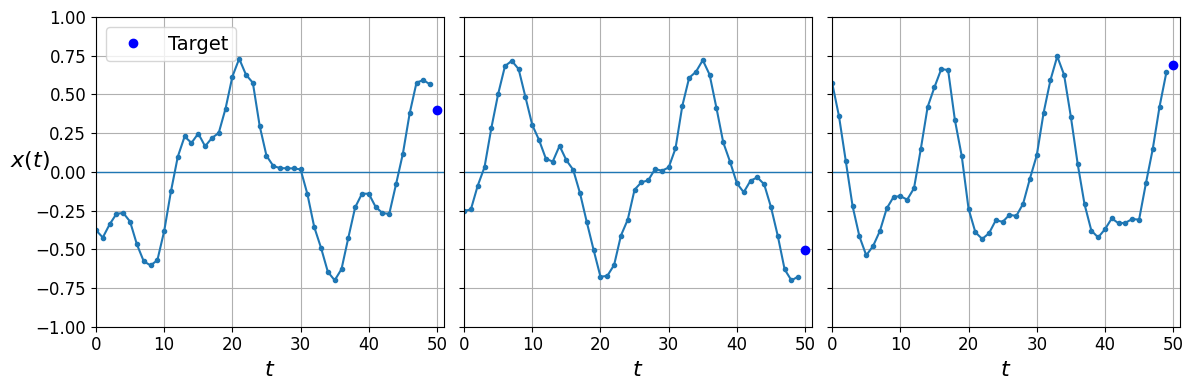

In [6]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
save_fig("time_series_plot")
plt.show()